In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter

print("Start boring CIF downloading...")

with MPRester("kljjGo7W1D4tHy5OZy") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-567290")

    # Dos for material id
    dos = m.get_dos_by_material_id("mp-567290")

    # Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-567290")

    CifWriter(structure,0.1,write_magmoms=False).write_file("LaN_mp-567290_symmetrized.cif")
    print("Boring download completed, ciao!")

Start boring CIF downloading...
Boring download completed, ciao!


In [9]:
lattice = get_structure_lattice("mp-567290")
lattice_reciprocal = get_structure_lattice_reciprocal("mp-567290")

# Les vecteurs de bases sont a1 , a2 et a3
# Les angles formés par ces vecteurs de bases sont alpha=beta=90° et gamma=120°
# Nous somme donc dans le cas d'une maile primitive hexagonal
# Les aretes formant la maille conventionnelle sont de longueurs a=b=4.133A° et c=5.96A°

#Le volume de la maille primitive est donné par Omega = a1 * (a2 x a3)
# On a donc les vecteurs de base du réseau réciproque:
#   a1° = (2pi/Omega) (a2 x a3)
#   a2° = (2pi/Omega) (a3 x a1)
#   a3° = (2pi/Omega) (a1 x a2)

#Groupe spatial P63mc (n°186) , groupe ponctuel 6mm

from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

with SpacegroupAnalyzer(structure) as lan

lan.find_primitive()
lan.get_crystal_system().get_ir_reciprocal_mesh(mesh=(10, 10, 10), is_shift=(0, 0, 0))
lan.get_lattice_type()
lan.get_point_group_symbol()
lan.get_primitive_standard_structure(international_monoclinic=True)
lan.get_space_group_number()
lan.get_space_group_symbol()



# Réseau cristallin du LaN

Le système cristallin du $LaN$ est hexagonal (groupe spatial $P6_3mc$, $n^°186$, groupe poncuel $6_3mc$). Dans ce cas, les mailles conventionnelle et primitive sont identiques et représentées à la figure 1. La maille primitive contient un atome de scandium, deux atomes de lanthane ainsi que deux atomes d'azote.

Pour déterminer le type de réseau formé par la maille primitive, il est utile de déterminer ses vecteurs de base ainsi que les angles qu’ils forment entre eux. Afin de simplifier l'écriture, on note $a = b = 4.133 A^°$ et  $c = 5.96 A^°$. Ces longueurs sont celles des arêtes du parallélépipède de la maille conventionnelle (voir Figure 1): $a$ pour les arêtes selon x ou y et $c$ pour l'arête selon z. 

Nous allons donc exprimé les vecteurs de base de la maille primitive dans le repère de la figure 1, propre à la maille conventionnelle.

Les trois vecteurs de base sont alors définis comme suit:


 $$a_1 = (\frac{a}{2},-\frac{sqrt{3}a}{2},0)$$
 
 $$a_2 = (\frac{a}{2},\frac{sqrt{3}a}{2},0)$$
 
 $$a_3 = (0,0,c)$$
 
Nous pouvons remarquer que les vecteurs $a_1$, $a_2$ sont de même normes. Les angles de la maille primitive étant $\alpha = \beta = 90^°$ et  $\gamma = 120^°$, nous sommes bien dans le cas d'une maille hexagonal. Le volume de cette maille est donné par:

$$\Omega = a_1 \cdot(a_2 \times a_3) = (\frac{a}{2},-\frac{\sqrt{3}a}{2},0)\cdot(\frac{\sqrt{3}ac}{2},\frac{-ac}{2},0) = \frac{\sqrt{3}a^2c}{2} = 88.167 A^{°3}$$
 

On retrouve bien la valeur donnée par le Material Project. Dés lors, nous pouvons calculer les vecteurs de base du réseau réciproque:

$$a_{1}^* = \frac{2\pi}{\Omega}(a_2 \times a_3) = \frac{2\pi}{\Omega}(\frac{\sqrt{3}ac}{2},-\frac{ac}{2},0) = 2\pi(\frac{1}{a},-\frac{1}{\sqrt{3}a},0) $$

$$a_{2}^* = \frac{2\pi}{\Omega}(a_3 \times a_1) = \frac{2\pi}{\Omega}(\frac{\sqrt{3}ac}{2},\frac{ac}{2},0) = 2\pi(\frac{1}{a},\frac{1}{\sqrt{3}a},0) $$

$$a_{3}^* = \frac{2\pi}{\Omega}(a_1 \times a_2) = \frac{2\pi}{\Omega}(0,0,\frac{\sqrt{3}a^2}{2}) = 2\pi(0,0,\frac{1}{c}) $$

Á partir de ces vecteurs, on calcule le volume de la maille primitive du réseau réciproque:

$$\Omega^* = a_{1}^* \cdot(a_{2}^* \times a_{3}^*) = \frac{16\pi^3}{\sqrt{3}a^2c} A^{°-3} = 2.8134 A^{°-3} $$

La relation $\Omega^* = \frac{(2\pi)^3}{\Omega}$ est respectée.

## Figure 1

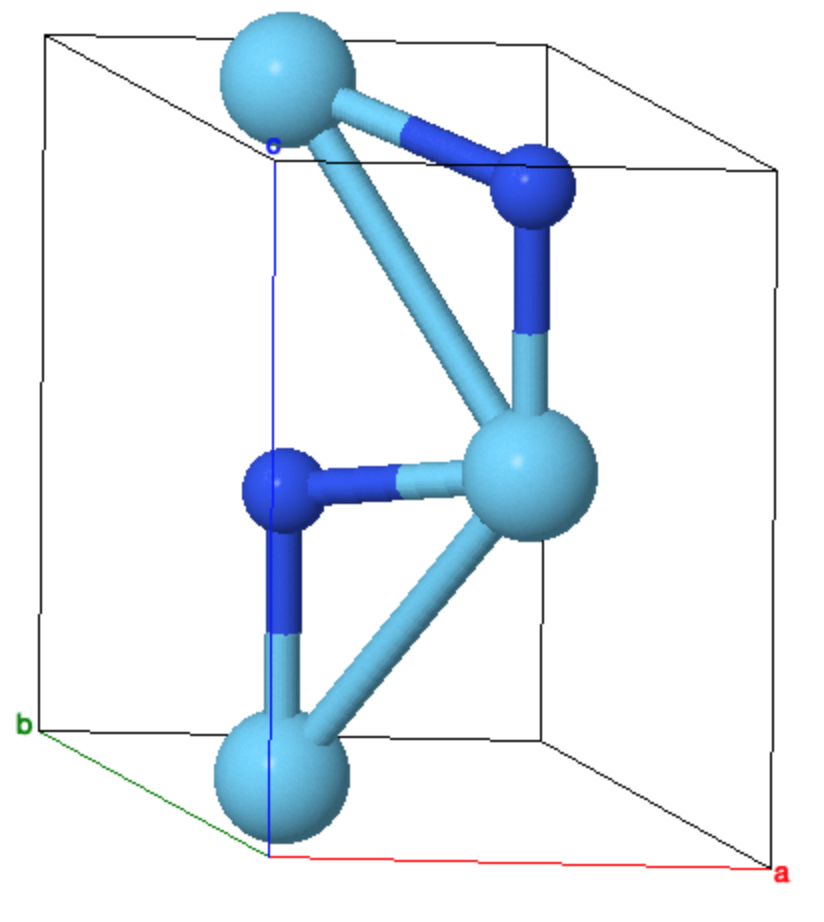

In [2]:
from IPython.display import Image
Image(filename="lmapr1492/mailleconv.png")